In [1]:
from Bio import SeqIO

def process_fastq_in_blocks(fastq_path, block_size=200):
    block_number = 0
    read_count = 0

    with open(fastq_path, 'r') as fastq_file:
        for record in SeqIO.parse(fastq_file, 'fastq'):
            if read_count % block_size == 0 and read_count > 0:
                print(f"Processed block number: {block_number}")
                block_number += 1
            read_count += 1

        # Handle the last block
        if read_count % block_size != 0:
            print(f"Processed block number: {block_number}")

# Example usage
fastq_path = '../assets/input/test-combined.fastq'  # Adjust the path if your file is in a different directory
process_fastq_in_blocks(fastq_path)

Processed block number: 0
Processed block number: 1
Processed block number: 2
Processed block number: 3
Processed block number: 4
Processed block number: 5
Processed block number: 6
Processed block number: 7
Processed block number: 8
Processed block number: 9
Processed block number: 10
Processed block number: 11
Processed block number: 12
Processed block number: 13
Processed block number: 14
Processed block number: 15
Processed block number: 16
Processed block number: 17
Processed block number: 18
Processed block number: 19
Processed block number: 20
Processed block number: 21
Processed block number: 22
Processed block number: 23
Processed block number: 24
Processed block number: 25
Processed block number: 26
Processed block number: 27
Processed block number: 28
Processed block number: 29
Processed block number: 30
Processed block number: 31
Processed block number: 32
Processed block number: 33
Processed block number: 34
Processed block number: 35
Processed block number: 36
Processed b

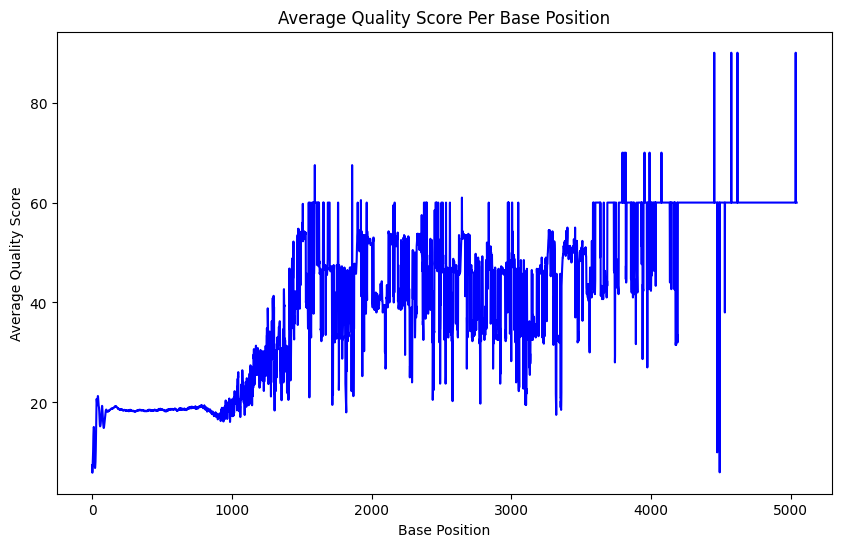

In [2]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

fastq_path = '../assets/input/test-combined.fastq'  # Adjust the path if your file is in a different directory
# Initialize a list to store quality scores for each base position
quality_per_base = []

# Read the FASTQ file and accumulate quality scores
with open(fastq_path, 'r') as fastq_file:
    for record in SeqIO.parse(fastq_file, 'fastq'):
        while len(quality_per_base) < len(record.seq):
            quality_per_base.append([])

        for i, quality in enumerate(record.letter_annotations["phred_quality"]):
            quality_per_base[i].append(quality)

# Calculate the average quality score per base
average_quality_per_base = [np.mean(quals) for quals in quality_per_base]

# Plotting the average quality score per base
plt.figure(figsize=(10, 6))
plt.plot(average_quality_per_base, color='blue')
plt.title('Average Quality Score Per Base Position')
plt.xlabel('Base Position')
plt.ylabel('Average Quality Score')
plt.show()

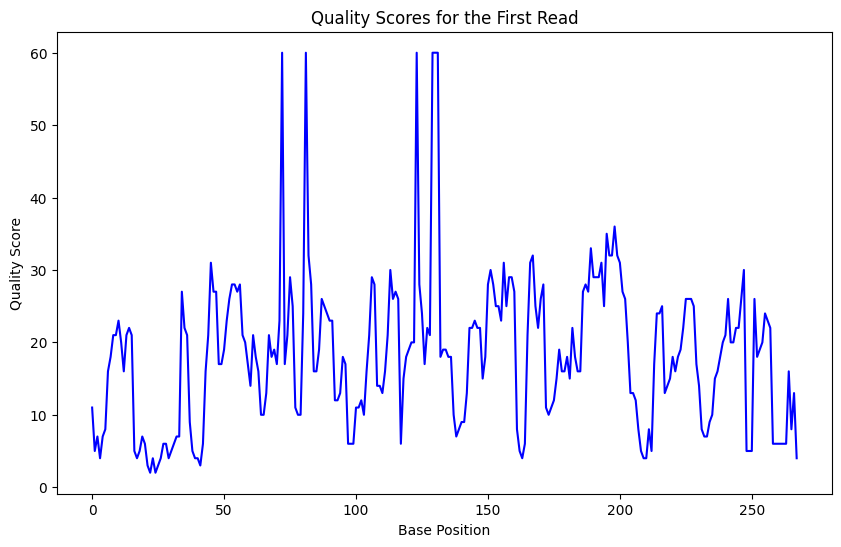

In [3]:
from Bio import SeqIO
import matplotlib.pyplot as plt

fastq_path = '../assets/input/test-combined.fastq'  # Adjust the path to your FASTQ file

# Read the FASTQ file and process only the first read
with open(fastq_path, 'r') as fastq_file:
    first_record = next(SeqIO.parse(fastq_file, 'fastq'))
    quality_scores = first_record.letter_annotations["phred_quality"]

# Plotting the quality scores for the first read
plt.figure(figsize=(10, 6))
plt.plot(quality_scores, color='blue')
plt.title('Quality Scores for the First Read')
plt.xlabel('Base Position')
plt.ylabel('Quality Score')
plt.show()
